#### Classification

#### Data Preprocessing

In [16]:
import keras as ks
import pandas as pd
import numpy as np

#匯入wine_quality file
wine_quality= pd.read_csv("C:\\Users\\user\\Desktop\\課程\\Machine Learning\\程式作業\\WineQT.csv")

#印出adult的資料結構
wine_quality.info()
# wine_quality.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [17]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
## onehotencoder
from sklearn.preprocessing import OneHotEncoder
X = wine_quality.drop("quality", axis=1)

onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(wine_quality[["quality"]]).toarray()
pd.DataFrame(y)

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
6492,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6493,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6494,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6495,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
#資料集切割(training&testing set)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15, random_state=6666)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

4547
4547
1950
1950


In [20]:
#切割訓練集&驗證集
size=(3/17)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=size, random_state=6666)
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

975
975
975
975


In [15]:
a = round(3/17,2)
b = 5522*a
print(b)

993.9599999999999


In [8]:
# #正規化
from sklearn.preprocessing import StandardScaler
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_val -= mean
X_val /= std
X_test -= mean
X_test /= std
X_train

## --------------------------------------------------------------------------------- ##
# from sklearn.preprocessing import MinMaxScaler
# columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
#     'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates',
#     'alcohol']
# minmax = MinMaxScaler()

# X_train[columns] = minmax.fit_transform(X_train[columns])
# X_test[columns] = minmax.fit_transform(X_test[columns])
# X_val[columns] = minmax.fit_transform(X_val[columns])

In [9]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2023,0.200000,0.086667,0.227642,0.013804,0.069767,0.156250,0.313364,0.109697,0.385827,0.112360,0.304348
1511,0.408333,0.100000,0.601626,0.039877,0.054817,0.048611,0.276498,0.121265,0.220472,0.162921,0.463768
5506,0.516667,0.380000,0.300813,0.069018,0.167774,0.034722,0.135945,0.298631,0.456693,0.235955,0.347826
2827,0.208333,0.040000,0.252033,0.009202,0.041528,0.180556,0.304147,0.071911,0.503937,0.073034,0.507246
1274,0.375000,0.180000,0.455285,0.202454,0.064784,0.187500,0.423963,0.235011,0.259843,0.202247,0.202899
...,...,...,...,...,...,...,...,...,...,...,...
4477,0.208333,0.160000,0.211382,0.111963,0.068106,0.180556,0.400922,0.154810,0.314961,0.157303,0.231884
225,0.266667,0.106667,0.333333,0.263804,0.061462,0.131944,0.320276,0.244650,0.456693,0.095506,0.101449
2205,0.316667,0.206667,0.276423,0.144172,0.078073,0.118056,0.396313,0.198381,0.409449,0.213483,0.318841
2877,0.216667,0.046667,0.447154,0.081288,0.059801,0.256944,0.359447,0.148641,0.181102,0.101124,0.188406


In [10]:
## 紀錄各組合的loss
loss_history={}

##### 紀錄每個組合的損失值與正確度

In [11]:
from math import sqrt
def loss_storage(loss,val_loss,numero):
    if(loss=='root_mean_squared_error'):
        mse_loss='loss'
        val_mse_loss='val_loss'
        temp=[]
        for i in range(len(model_train.history[mse_loss])):
            temp.append(sqrt(model_train.history[mse_loss][i]))
        model_train.history[loss]=temp
        loss_history[loss+str(numero)]=model_train.history[loss]
        temp=[]
        for i in range(len(model_train.history[val_mse_loss])):
            temp.append(sqrt(model_train.history[val_mse_loss][i]))
        model_train.history[val_loss]=temp
        loss_history[val_loss+str(numero)]=model_train.history[val_loss]        
    # 對訓練過程的mse繪圖
    loss_history[loss+str(numero)]=model_train.history[loss]
    loss_history[val_loss+str(numero)]=model_train.history[val_loss]

#### 建立神經網路架構

In [12]:
# 建立神經網路架構
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Activation,BatchNormalization
# 模型架構
model = Sequential() 
model.add(Input(shape=(11,), name='Input-Layer'))                                
model.add(Dense(100,activation='relu',name='Hidden-Layer1'))# 增加一層神經層, 使用 ReLU 激活函數, 輸入層有11個輸入特徵
# model.add(BatchNormalization())
model.add(Dense(100,activation='relu',name='Hidden-Layer2'))  # 增加一層神經層, 使用 ReLU 激活函數
model.add(Dense(100,activation='relu',name='Hidden-Layer3'))
model.add(Dense(100,activation='relu',name='Hidden-Layer4'))
model.add(Dense(100,activation='relu',name='Hidden-Layer5'))

model.add(Dense(7,activation='softmax',name='Output-Layer')) #multi-class&single-label  
#編譯模型
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#模型訓練
#設定early stopping
threshold = 10
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=threshold, monitor = 'val_loss'),
    tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-3 * 10 ** (epoch / 30)
    )
]

model_train = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=200, batch_size=16,callbacks=[my_callbacks],verbose=1)
print(f"訓練最好的Epoch{len(model_train.history['val_loss'])-threshold}，val_loss:{model_train.history['val_loss'][(len(model_train.history['val_loss'])-threshold)-1]}/val_accuracy:{model_train.history['val_accuracy'][(len(model_train.history['val_loss'])-threshold)-1]}")

loss_storage('loss','val_loss',numero=4)
loss_storage('accuracy','val_accuracy',numero=4)

Epoch 1/200
285/285 [==============================] - 2s 4ms/step - loss: 1.2067 - accuracy: 0.4887 - val_loss: 1.1289 - val_accuracy: 0.5374 - lr: 0.0010
Epoch 2/200
285/285 [==============================] - 1s 3ms/step - loss: 1.1100 - accuracy: 0.5300 - val_loss: 1.1703 - val_accuracy: 0.5097 - lr: 0.0011
Epoch 3/200
285/285 [==============================] - 1s 3ms/step - loss: 1.0992 - accuracy: 0.5353 - val_loss: 1.1979 - val_accuracy: 0.4974 - lr: 0.0012
Epoch 4/200
285/285 [==============================] - 1s 3ms/step - loss: 1.0868 - accuracy: 0.5384 - val_loss: 1.1553 - val_accuracy: 0.5138 - lr: 0.0013
Epoch 5/200
285/285 [==============================] - 1s 3ms/step - loss: 1.0803 - accuracy: 0.5481 - val_loss: 1.2558 - val_accuracy: 0.4954 - lr: 0.0014
Epoch 6/200
285/285 [==============================] - 1s 4ms/step - loss: 1.0699 - accuracy: 0.5492 - val_loss: 1.1710 - val_accuracy: 0.5313 - lr: 0.0015
Epoch 7/200
285/285 [==============================] - 1s 3ms/st

In [70]:
model_train.history

{'loss': [1.3607912063598633,
  1.1071557998657227,
  1.0739353895187378,
  1.0550862550735474,
  1.0443254709243774,
  1.0264558792114258,
  1.0196367502212524,
  1.004097819328308,
  0.9968240857124329,
  0.9883866906166077,
  0.9782732725143433,
  0.9731866121292114,
  0.9625141024589539,
  0.9648706912994385,
  0.9614328742027283,
  0.9543469548225403,
  0.9440017342567444,
  0.9313116073608398,
  0.933205783367157,
  0.9240216612815857,
  0.9291405081748962,
  0.9221599102020264,
  0.9296774864196777,
  0.911605715751648,
  0.9110984206199646,
  0.9090201258659363,
  0.9045913219451904,
  0.9079473614692688],
 'accuracy': [0.46382230520248413,
  0.5528920292854309,
  0.5685067176818848,
  0.5696063041687012,
  0.5696063041687012,
  0.5726853013038635,
  0.5775236487388611,
  0.5834616422653198,
  0.5812623500823975,
  0.5808225274085999,
  0.586980402469635,
  0.5918188095092773,
  0.5957774519920349,
  0.5885199308395386,
  0.5933582782745361,
  0.5882999897003174,
  0.6019353270

##### Network structure

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer1 (Dense)       (None, 100)               1200      
                                                                 
 Hidden-Layer2 (Dense)       (None, 100)               10100     
                                                                 
 Hidden-Layer3 (Dense)       (None, 100)               10100     
                                                                 
 Hidden-Layer4 (Dense)       (None, 100)               10100     
                                                                 
 Hidden-Layer5 (Dense)       (None, 100)               10100     
                                                                 
 Output-Layer (Dense)        (None, 7)                 707       
                                                                 
Total params: 42,307
Trainable params: 42,307
Non-traina

In [72]:
### strorage into csv

In [73]:
import matplotlib.pyplot as plt
def picture(loss_history,name,label_name,label,ylabel_name):
    from matplotlib import colors as mcolors ## 顏色集
    colors=list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())[::-1]
    
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  ## 設定中文不亂碼
    plt.rcParams['axes.unicode_minus'] = False ## 設定中文不亂碼
    plt.figure(figsize =(10,4))
    num=1
    for k in label_name:
        plt.plot([x for x in range(1,len(loss_history[k])+1)], loss_history[k], label=label+str(num),color=colors.pop())
        num+=1
    # plt.xticks(range(1,len(model_train.history[val_loss])+1))
    plt.ylabel(f'{ylabel_name}')
    plt.xlabel("epoch") 
    plt.title(f'{name}')
    # plt.grid(True)#有網格
    plt.legend()#可以印出label
    plt.show()

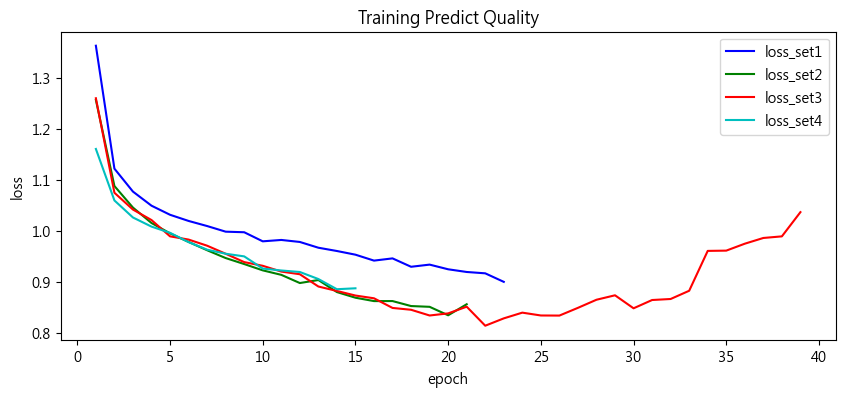

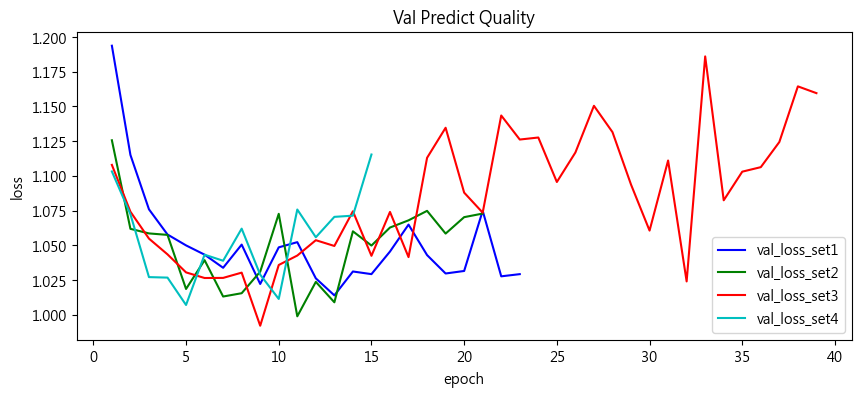

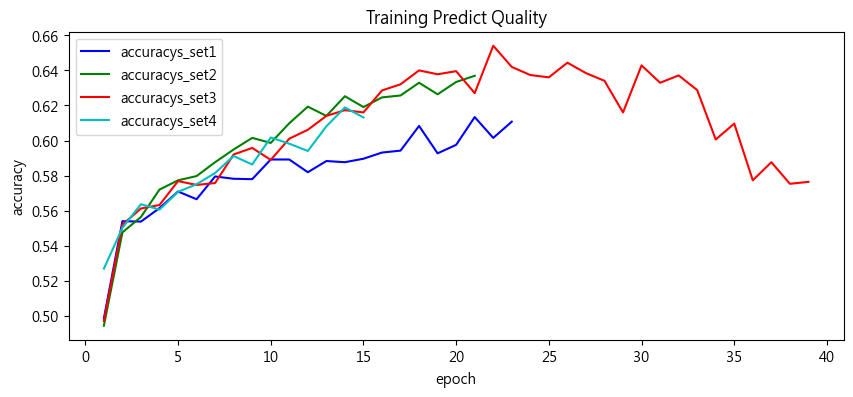

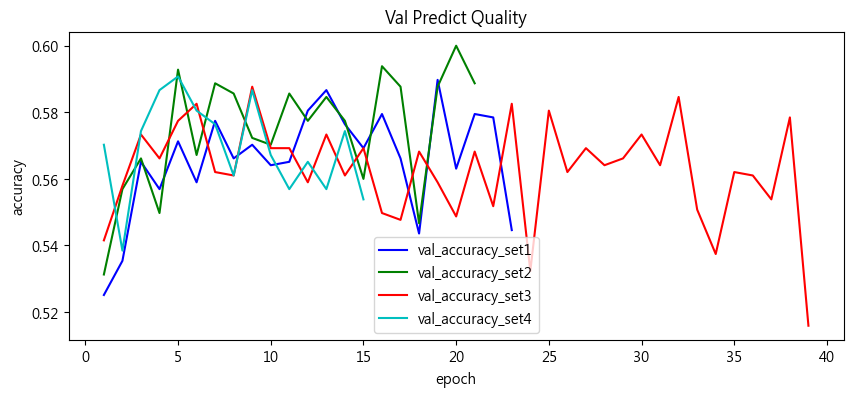

In [110]:
name=['loss1','loss2','loss3','loss4']
picture(loss_history,"Training Predict Quality",name,'loss_set','loss')
name=['val_loss1','val_loss2','val_loss3','val_loss4']
picture(loss_history,"Val Predict Quality",name,'val_loss_set','loss')
name=['accuracy1','accuracy2','accuracy3','accuracy4']
picture(loss_history,"Training Predict Quality",name,'accuracys_set','accuracy')
name=['val_accuracy1','val_accuracy2','val_accuracy3','val_accuracy4']
picture(loss_history,"Val Predict Quality",name,'val_accuracy_set','accuracy')

#### 驗證資料評估績效

In [81]:
#驗證資料預測
val_pred=model.predict(X_val)
print(np.argmax(val_pred[0]))

31/31 [==============================] - 0s 4ms/step
3


In [82]:
#產生混淆矩陣
##驗證資料prediction
pred_val_list=[]
np.argmax(val_pred[0])
for i in val_pred:
    pred_val_list.append(np.argmax(i))
print(pred_val_list)

## 驗證資料 target
y_val_list=[]
np.argmax(val_pred[0])
for j in y_val:
    y_val_list.append(np.argmax(j))
print(y_val_list)

[3, 3, 4, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 4, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 4, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 4, 1, 3, 2, 2, 4, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 4, 3, 4, 3, 3, 2, 4, 3, 4, 3, 3, 2, 2, 2, 2, 3, 3, 4, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 4, 3, 3, 4, 2, 3, 2, 2, 4, 2, 2, 4, 3, 3, 2, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 4, 3, 2, 2, 3, 4, 3, 2, 2, 4, 2, 2, 3, 4, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 4, 2, 2, 2, 2, 2, 3, 3, 3, 4, 2, 2, 3, 2, 3, 2, 4, 3, 2, 3, 4, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 4, 2, 4, 2, 2, 2, 3, 2, 3, 2, 3, 3, 4, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 2, 4, 2, 2, 2, 3, 2, 0, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 

In [83]:
#輸出混亂矩陣，顯示準確率
from sklearn.metrics import confusion_matrix,classification_report
print("輸出混亂矩陣，顯示準確率：使用驗證資料")
print(confusion_matrix(y_val_list,pred_val_list))
## 一般情況zero_division會設1(true)，除非確定每個類別都有被預測到才會設0
print(classification_report(y_val_list,pred_val_list,zero_division=0))

輸出混亂矩陣，顯示準確率：使用驗證資料
[[  0   0   1   1   0   0   0]
 [  0   0  26  11   2   0   0]
 [  1   4 215 109   3   0   0]
 [  2   2  87 285  25   0   0]
 [  0   0   3  98  64   0   0]
 [  0   0   0  20  11   4   0]
 [  0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        39
           2       0.65      0.65      0.65       332
           3       0.54      0.71      0.62       401
           4       0.60      0.39      0.47       165
           5       1.00      0.11      0.21        35
           6       0.00      0.00      0.00         1

    accuracy                           0.58       975
   macro avg       0.40      0.27      0.28       975
weighted avg       0.58      0.58      0.56       975



#### 測試資料評估績效

In [107]:
#測試資料預測
test_pred=model.predict(X_test)
print(np.argmax(test_pred[:]))

31/31 [==============================] - 0s 3ms/step
4007


In [108]:
#產生混淆矩陣
##測試資料prediction
pred_test_list=[]
for i in test_pred:
    pred_test_list.append(np.argmax(i))
print(pred_test_list)

## 驗證資料 target
y_test_list=[]
for j in y_test:
    y_test_list.append(np.argmax(j))
print(y_test_list)

[2, 4, 4, 3, 2, 2, 3, 3, 2, 3, 4, 2, 2, 3, 2, 3, 3, 3, 4, 2, 4, 3, 4, 2, 2, 3, 4, 3, 2, 3, 2, 3, 3, 2, 3, 2, 4, 2, 3, 3, 3, 2, 2, 4, 2, 3, 2, 3, 3, 3, 2, 3, 4, 2, 4, 4, 2, 2, 3, 3, 3, 4, 3, 4, 3, 2, 2, 2, 3, 4, 3, 2, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 4, 4, 2, 2, 4, 3, 2, 4, 3, 3, 4, 2, 2, 2, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 2, 3, 4, 2, 3, 3, 3, 2, 3, 3, 2, 2, 4, 2, 4, 4, 3, 3, 2, 3, 3, 3, 4, 1, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 4, 3, 4, 3, 2, 3, 3, 2, 2, 4, 2, 5, 4, 3, 3, 4, 3, 4, 2, 3, 4, 3, 3, 3, 4, 2, 3, 4, 3, 3, 2, 3, 4, 2, 2, 3, 3, 3, 3, 3, 4, 2, 3, 3, 4, 3, 3, 4, 4, 3, 3, 2, 3, 2, 3, 1, 3, 3, 3, 2, 1, 3, 3, 4, 3, 2, 3, 2, 2, 3, 4, 2, 3, 3, 4, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 4, 3, 2, 3, 3, 2, 3, 1, 3, 3, 2, 3, 2, 2, 1, 2, 4, 3, 3, 3, 2, 4, 3, 2, 3, 2, 1, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 4, 4, 2, 2, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 2, 3, 3, 3, 2, 4, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 4, 2, 3, 2, 3, 3, 3, 4, 1, 4, 3, 4, 3, 2, 3, 2, 3, 1, 4, 3, 3, 3, 3, 4, 2, 2, 2, 3, 3, 3, 2, 2, 

In [109]:
#輸出混亂矩陣，顯示準確率
from sklearn.metrics import confusion_matrix,classification_report
print("輸出混亂矩陣，顯示準確率：使用測試資料")
print(confusion_matrix(y_test_list,pred_test_list))
print(classification_report(y_test_list,pred_test_list,zero_division=0))

輸出混亂矩陣，顯示準確率：使用測試資料
[[  0   0   1   0   1   0]
 [  0   5  19  10   2   0]
 [  0   7 178 108  12   0]
 [  0   5  86 262  77   1]
 [  0   0   4  82  83   5]
 [  0   0   2   8  16   1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.29      0.14      0.19        36
           2       0.61      0.58      0.60       305
           3       0.56      0.61      0.58       431
           4       0.43      0.48      0.45       174
           5       0.14      0.04      0.06        27

    accuracy                           0.54       975
   macro avg       0.34      0.31      0.31       975
weighted avg       0.53      0.54      0.53       975



In [ ]:
pd.DataFrame(y_test)

#### The relationship between Learning rate and Loss

In [113]:
print(len(loss_history['loss4']))
loss_history['loss4']

15


[1.160246729850769,
 1.0591846704483032,
 1.0257502794265747,
 1.007850170135498,
 0.995662271976471,
 0.9774675369262695,
 0.9626023769378662,
 0.9546290636062622,
 0.949428141117096,
 0.9255296587944031,
 0.9217474460601807,
 0.9187919497489929,
 0.9049713611602783,
 0.884986162185669,
 0.8867989778518677]

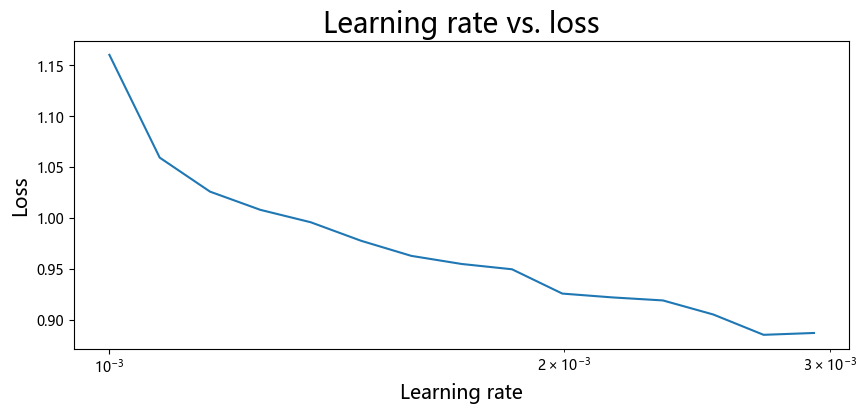

In [118]:
learning_rates = 1e-3 * (10 ** (np.arange(15) / 30))
## 用來顯示科學記號的負號
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize =(10,4))
plt.semilogx(
    learning_rates, 
    loss_history['loss4']
    
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14)
plt.show()